In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

Gradient Descent with learning rate = 0.01


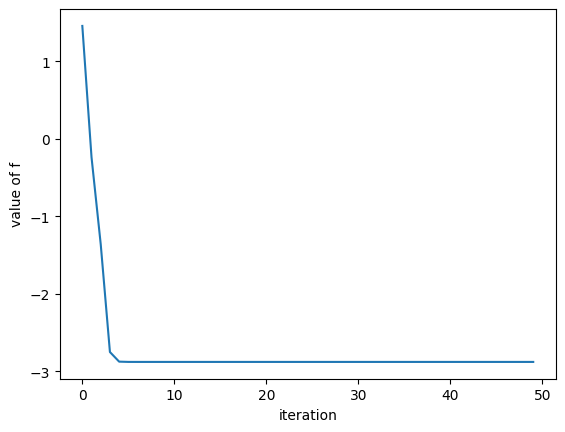


Gradient Descent with learning rate = 0.1


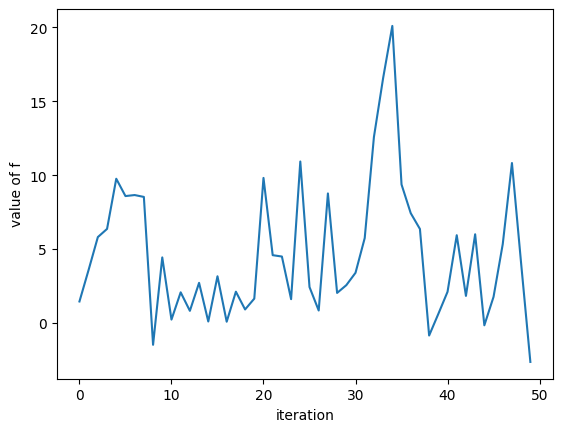


Minimum values and locations with learning rate = 0.01:


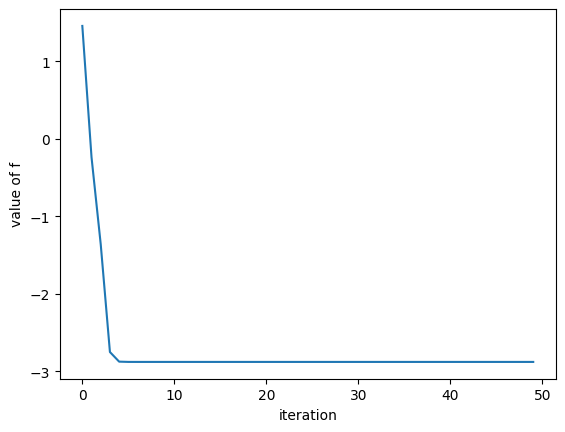

Starting point (0.1, 0.1): Minimum value = -2.8790846587644263, Location = (-0.24182894588827974, -6.848884023658433e-35)


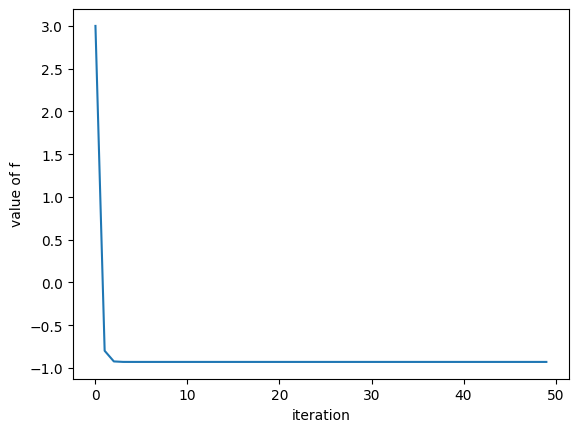

Starting point (1, 1): Minimum value = -0.9286447086312597, Location = (0.7252678803578847, 0.9831635693235358)


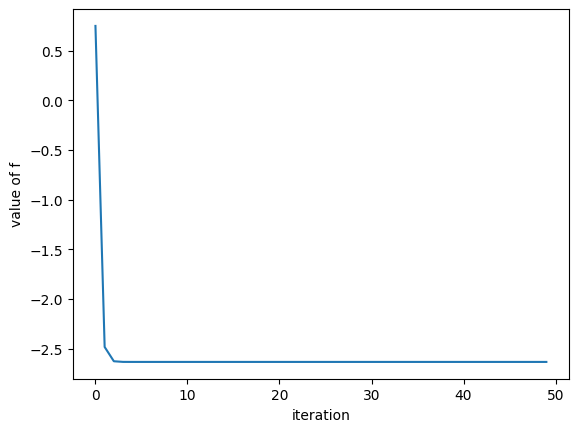

Starting point (0.5, 0.5): Minimum value = -2.633242590975637, Location = (0.24181813075114938, 0.4916822590684804)


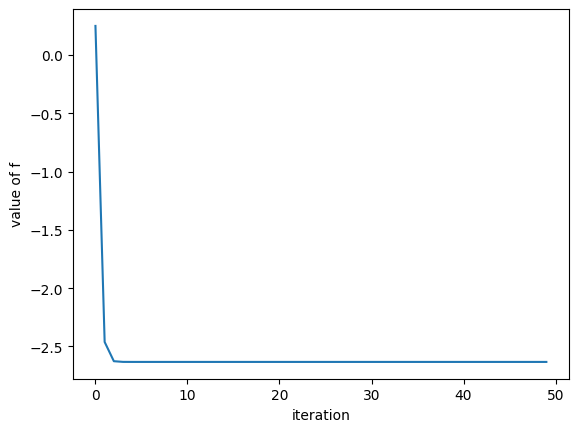

Starting point (0.0, 0.5): Minimum value = -2.633242590975637, Location = (0.2418181307511494, 0.4916822590684803)


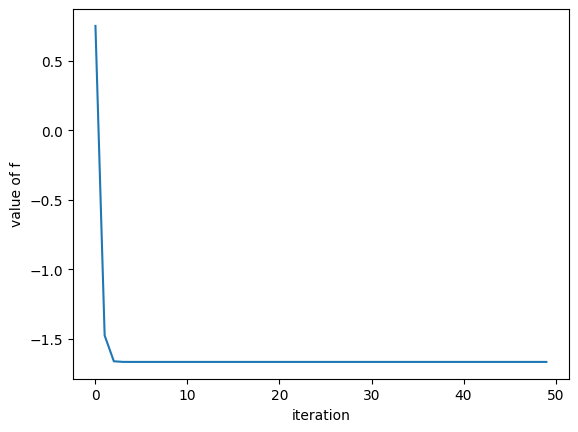

Starting point (-0.5, -0.5): Minimum value = -1.6660267055389741, Location = (-0.7253691676028068, -0.4915941934004666)


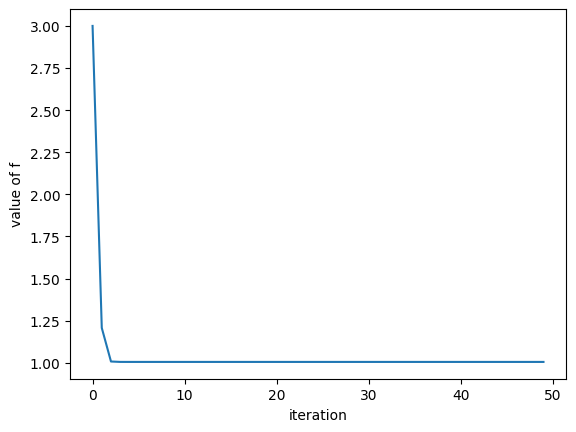

Starting point (-1, 1): Minimum value = 1.0051615759793315, Location = (-1.2084759495263577, 0.9827889176425988)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def functionf(x, y):
    '''
    Computes the value of an arbitrary function in two variables at the input location
    '''
    '''
    TODO: return the value of the function at (x, y)
    return ?
    '''
    return 2*x**2 + y**2 + 3*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

def gradientf(x, y):
    '''
    Computes the gradient of an arbitrary function in two variables at the input location
    '''
    '''
    TODO: compute the gradient
    df_by_dx = ?
    df_by_dy = ?
    '''
    df_by_dx = 4*x + 6*np.pi*np.cos(2*np.pi*x)*np.cos(2*np.pi*y)
    df_by_dy = 2*y - 6*np.pi*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)
    return df_by_dx, df_by_dy

def gradientDescent4f(x, y, eta=0.001, max_iters=100):
    '''
    Performs gradient descent to find the location at which the value of an arbitrary function is minimized
    '''
    fvals = []
    for i in range(max_iters):
        fval = functionf(x, y)
        fvals.append(fval)
        grad = gradientf(x, y)
        '''
        TODO: Update x, y
        x = ?
        y = ?
        '''
        x -= eta * grad[0]
        y -= eta * grad[1]
    plt.plot(range(max_iters), fvals)
    plt.xlabel('iteration')
    plt.ylabel('value of f')
    plt.show()
    return x, y

x_start, y_start = 0.1, 0.1

print("Gradient Descent with learning rate = 0.01")
x_min_001, y_min_001 = gradientDescent4f(x_start, y_start, eta=0.01, max_iters=50)

print("\nGradient Descent with learning rate = 0.1")
x_min_01, y_min_01 = gradientDescent4f(x_start, y_start, eta=0.1, max_iters=50)

starting_points = [(0.1, 0.1), (1, 1), (0.5, 0.5), (0.0, 0.5), (-0.5, -0.5), (-1, 1)]
learning_rate = 0.01
max_iters = 50

print("\nMinimum values and locations with learning rate = 0.01:")
for i, (x_start, y_start) in enumerate(starting_points):
    x_min, y_min = gradientDescent4f(x_start, y_start, eta=learning_rate, max_iters=max_iters)
    min_value = functionf(x_min, y_min)
    print(f"Starting point {starting_points[i]}: Minimum value = {min_value}, Location = ({x_min}, {y_min})")


In [3]:
'''
Reading the MNIST/USPS Handwritten Digits Dataset
'''
'''
Dependencies
'''
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import permutations, combinations_with_replacement
import copy

def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            if yval == 1 or yval == 5:
              y.append(yval)
              xvals = [float(pixel) for pixel in row[1:]]
              X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

In [4]:
Xtrain, Ytrain = readData('ZipDigits.train')
Xtest, Ytest = readData('ZipDigits.test')

X shape: (1561, 256)
y shape: (1561, 1)
X shape: (424, 256)
y shape: (424, 1)


In [5]:
'''
Computing Features
'''


def computeIntensity(X):
    '''
    Compute the average intensity feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    intensities = np.matmul(X, np.ones((d, 1)))/d
    print(f'Output shape {intensities.shape}')
    return intensities


def computeSymmetry(X):
    '''
    Compute the symmetry feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    symmetries = [np.sum(np.abs((Ximgs[n] - Ximgs_flipped[n])
                                ).reshape(256, ))/d for n in range(N)]
    symmetries = -np.array(symmetries)
    symmetries = symmetries.reshape(N, 1)
    print(f'Output shape {symmetries.shape}')
    return symmetries

In [6]:
'''
Computing the augmented feature matrix
'''


def computeAugmentedXWithFeatures(X):
    '''
    Compute the augmented feature matrix
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    print(f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug

In [7]:
'''
Compute the augmented matrix with features
'''

print('Computing augmented training feature matrix')

Xaugtrain = computeAugmentedXWithFeatures(Xtrain)

Naugtrain, d = Xaugtrain.shape

print('Computing augmented test feature matrix')

Xaugtest = computeAugmentedXWithFeatures(Xtest)

Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 1561, 256
Output shape (1561, 1)
computing symmetry feature
Input shape 1561, 256
Output shape (1561, 1)
Shape of augmented feature matrix: (1561, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 424, 256
Output shape (424, 1)
computing symmetry feature
Input shape 424, 256
Output shape (424, 1)
Shape of augmented feature matrix: (424, 3)


In [8]:
'''
Create the dataset wih digits 1 and 5
'''


def indexDigits(y):
    '''
    A helper function to locate examples by label
    Input:
        y: N x 1 2 dimensional numpy array; labels for handwritten digits
    Output:
        digit_idxs: a dictionary; the keys are digits 0 -- 9
                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k
    '''
    N = y.shape[0]
    digit_idxs = {}
    for n in range(N):
        digit = Ytrain[n, 0]
        if not digit in digit_idxs:
            digit_idxs[digit] = []
        digit_idxs[digit].append(n)
    return digit_idxs

In [9]:
'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

if True:
    digit_idxs_train = indexDigits(Xaugtrain)
    X1train = Xaugtrain[digit_idxs_train[1], :]
    print(X1train)
    N1train = X1train.shape[0]
    print(f'number of 1s: {N1train}')
    X5train = Xaugtrain[digit_idxs_train[5], :]
    print(X5train)
    N5train = X5train.shape[0]
    print(f'number of 5s: {N5train}')

    Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]
    ytrain = np.concatenate(
        (np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)
    Ntrain, d = Xtrain.shape
    print(f'number of 1s and 5s: {Ntrain}')
    print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')

[[ 1.         -0.75391406 -0.1174375 ]
 [ 1.         -0.77228125 -0.16229688]
 [ 1.         -0.76925781 -0.0595    ]
 ...
 [ 1.         -0.60979297 -0.21638281]
 [ 1.         -0.66230859 -0.09282031]
 [ 1.         -0.44755859 -0.13085156]]
number of 1s: 1005
[[ 1.         -0.11173828 -0.53372656]
 [ 1.         -0.56403516 -0.40299219]
 [ 1.         -0.392      -0.3865625 ]
 ...
 [ 1.         -0.26407812 -0.662     ]
 [ 1.         -0.28941406 -0.58520312]
 [ 1.         -0.53423828 -0.51378906]]
number of 5s: 556
number of 1s and 5s: 1561
Xtrain shape: (1561, 3), ytrain shape: (1561, 1)


In [10]:
'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

if True:
    digit_idxs_test = indexDigits(Xaugtest)
    X1test = Xaugtest[digit_idxs_test[1], :]
    print(X1test)
    N1test = X1test.shape[0]
    print(f'number of 1s: {N1test}')
    X5test = Xaugtest[digit_idxs_test[5], :]
    print(X5test)
    N5test = X5test.shape[0]
    print(f'number of 5s: {N5test}')

    Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
    ytest = np.concatenate(
        (np.ones((N1test, 1)), -1*np.ones((N5test, 1))), axis=0)
    Ntest, d = Xtest.shape
    print(f'number of 1s and 5s: {Ntest}')
    print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')


[[ 1.         -0.35032031 -0.7656875 ]
 [ 1.         -0.49764063 -0.3924375 ]
 [ 1.         -0.75078125 -0.0859375 ]
 [ 1.         -0.56176563 -0.11640625]
 [ 1.         -0.25580078 -0.75794531]
 [ 1.         -0.51044141 -0.17694531]
 [ 1.         -0.54045703 -0.31677344]
 [ 1.         -0.69753516 -0.03219531]
 [ 1.         -0.59622266 -0.13691406]
 [ 1.         -0.646625   -0.33245313]
 [ 1.         -0.41974609 -0.35819531]
 [ 1.         -0.38682422 -0.50897656]
 [ 1.         -0.61341406 -0.23557812]
 [ 1.         -0.71815234 -0.36572656]
 [ 1.         -0.59414453 -0.07711719]
 [ 1.         -0.29539453 -0.43547656]
 [ 1.         -0.66494531 -0.069625  ]
 [ 1.         -0.72013281 -0.10129687]
 [ 1.         -0.77421094 -0.06634375]
 [ 1.         -0.50392969 -0.53129688]
 [ 1.         -0.77693359 -0.32941406]
 [ 1.         -0.28723438 -0.57026562]
 [ 1.         -0.58141016 -0.08566406]
 [ 1.         -0.59074219 -0.162375  ]
 [ 1.         -0.56409375 -0.25682812]
 [ 1.         -0.75060938

In [11]:
if True:
    digit_idxs_test = indexDigits(Xaugtest)
    Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
    ytest = np.concatenate((np.ones(
        (len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)
    Ntest, d = Xtest.shape
    print(f'number of 1s and 5s: {Ntest}')
    print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')

number of 1s and 5s: 424
Xtest shape: (424, 3), ytest shape: (424, 1)


In [33]:
def E(w, X, y, R=None):
    '''
    point-wise error measure for classification
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    N = X.shape[0]
    '''
    TODO: Compute the (average) misclassification error of the linear model with weights w
    on the data points in the data set X whose labels are in y
    yhat = ?
    error = ?
    return error
    '''
    yhat = np.sign(np.dot(X, w))  # Assuming binary classification, using sign function

    # Compute the misclassification error
    error = np.mean(yhat != y)  # Misclassification error is the average of incorrect predictions

    return error

In [34]:
def sigmoid(s):
    '''
    Implements the sigmoid function
    '''
    '''
    TODO: Implement the sigmoid function
    return ?
    '''
    if s >= 0:
        return 1 / (1 + np.exp(-s))
    else:
        return np.exp(s) / (1 + np.exp(s))

In [35]:
def gradientCrossEntropyError(w, X, y):
    '''
    Computes the gradient of the cross entropy error function on the dataset X, y at input weights w
    See LFD Exercise 3.7
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
    Output:
        gradient: a 2D (d+1) x 1 numpy array,
                  gradient of the cross entropy error function on the dataset X, y at input weights w
    '''
    N, d = X.shape
    grad = np.zeros((d, 1))
    '''
    TODO: Compute the gradient at w
    for n in range(N):
        ?
    '''
    for n in range(N):
        y_pred = sigmoid(np.dot(X[n], w))
        error = y_pred - y[n]
        error = error.reshape(-1, 1)
        grad += np.outer(X[n], error)
    return grad

In [36]:
def logisticRegression(X, y, eta=0.001, w_init=None, max_iters=1000):
    '''
    Implements the gradient descent algorithm for Logistic Regression
    See LFD Example 3.3
    Input:
        X: A 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        eta: positive real number, learning rate
        w_init: A 2D (d+1) x 1 numpy array, initial weights to start gradient descent
        max_iters: positive integer, maxmimum number of iterations of gradient descent
    Output:
        w: A 2D (d+1) x 1 numpy array, weights with (approximately) lowest error on the input training set X, y
    '''
    N, d = X.shape
    w = np.zeros((d, 1))
    if not isinstance(w_init, type(None)):
        w = w_init
    Eins = []
    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        grad = gradientCrossEntropyError(w, X, y)
        '''
        TODO: Complete the implementation of the gradient descent algorithm
        w += ?
        '''
        w -= eta * grad
    plt.plot(range(max_iters), Eins)
    return w

In [37]:
'''
Helper function to plot a linear separator
'''


def plotLinearSeparator(w, X, y, title='', Xs=None, Xlabels=None, markers=None):
    '''
    Plot data points a linear separator
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
        title: a string
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    '''
    Plot data points in X, y
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    '''
    Plot separator
    '''
    pltxs = np.linspace(-1, 0.21)
    pltys = - (w[0] + w[1] * pltxs) / w[2]
    axs.plot(pltxs, pltys, color='green', label='separator')
    axs.set_title(title)
    axs.legend()
    plt.show()

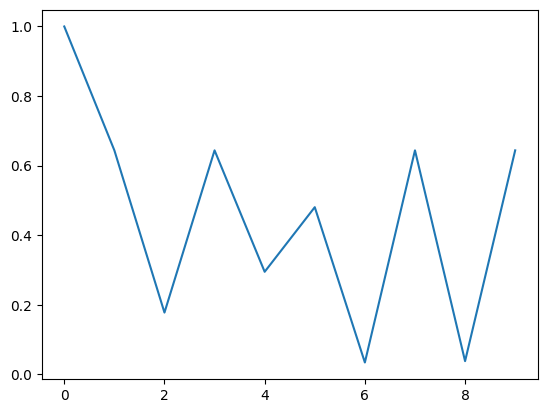

In [60]:
'''
Run the logistic regression algorithm to classify 1s vs 5s
'''

if True:
    max_iters = 10
    eta = 0.5
    w_log = logisticRegression(Xtrain, ytrain, eta=eta, max_iters=max_iters)

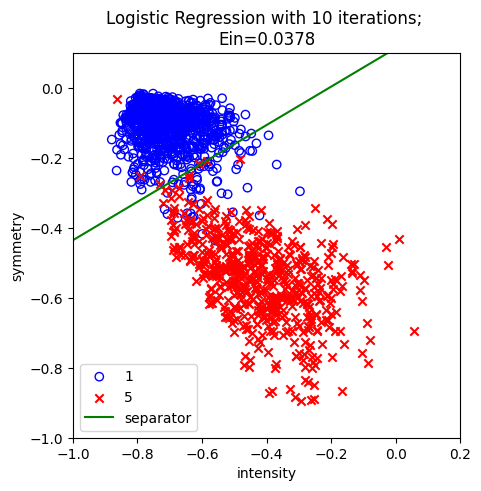

In [61]:
if True:
    Ein = np.round(E(w_log, Xtrain, ytrain), 5)
    plotLinearSeparator(w_log, Xtrain, ytrain,
                        title=f'Logistic Regression with {max_iters} iterations; \nEin={Ein}')

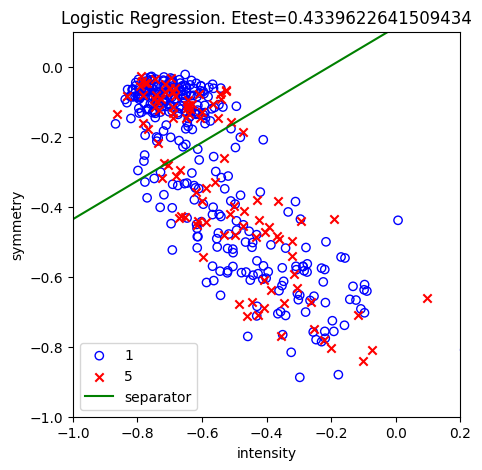

In [62]:
if True:
    Etest = E(w_log, Xtest, ytest)
    plotLinearSeparator(w_log, Xtest, ytest,
                        title=f'Logistic Regression. Etest={Etest}')

In [41]:
import numpy as np

Ein = 0.0378
Etest = 0.4339
N_Ein = 1561
N_Etest = 424
delta = 0.05

# Calculating bounds
Eout_bound_Ein = Ein + np.sqrt((1 / (2 * N_Ein)) * np.log(2 / delta))
Eout_bound_Etest = Etest + np.sqrt((1 / (2 * N_Etest)) * np.log(2 / delta))

print("Bound based on Ein for logistic regression:", Eout_bound_Ein)
print("Bound based on Etest for logistic regression:", Eout_bound_Etest)

Bound based on Ein for logistic regression: 0.07217405617649689
Bound based on Etest for logistic regression: 0.49985524009424176


In [42]:
def polynomialTransform(X, Q):
    '''
    Compute the polynomial transform features
    See LFD Example 3.3
    Input:
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        Q: positive integer, the desired degree of polynomial
    Output:
        Z: A 2D N x (dtilde+1) numpy array
           The n-th row Z[n, :] contains features corresponding to the Q-th order polynomial transform of X[n, :]
           Z[n, 0] = 1
           Z[n, 1], ..., Z[dtilde] contain the transformed features
    Warning and TODO: This is a hack! Can we do better?
    '''
    '''
    Init
    '''
    N, d = X.shape
    if np.all(X[:, 0] == np.ones((N, 1))):
        X = X[:, 1:]
    N, d = X.shape
    # TODO: Compute the features of the Q-th order polynomial transform.
    # It may be easier to implement it only for the value of Q specified in the homework
    # instead of implementing it for all possible values of Q.
    degrees = range(Q+1)
    perms = permutations(range(d))
    perms = list(perms)
    combs = combinations_with_replacement(degrees, d)
    combs = list(combs)
    '''
    List feature names
    '''
    terms = []
    ftnames = []
    for c in combs:
        if np.sum(c) == 0:
            continue
        if np.sum(c) > Q:
            continue
        for p in perms:
            ftname = '*'.join(sorted([f'x[{p[i]}]^{c[i]}' for i in range(d)]))
            if ftname in ftnames:
                continue
            terms.append((c, p))
            ftnames.append(ftname)
    '''
    Compute features
    '''
    Z = []
    for n in range(N):
        x = X[n, :]
        z = []
        for t in terms:
            (c, p) = t
            v = np.prod([x[p[i]]**c[i] for i in range(d)])
            z.append(v)
        z = [1] + z
        Z.append(z)
    Z = np.array(Z)
    return Z

In [43]:
if True:
    Xdebug = [[1, 2, 3]]
    Xdebug = np.array(Xdebug)

    Z = polynomialTransform(Xdebug, 3)

    print(f'Z shape {Z.shape}')
    print(Z)

Z shape (1, 10)
[[ 1  3  2  9  4 27  8  6 18 12]]


In [44]:
if True:
    Q = 3
    Ztrain = polynomialTransform(Xtrain, Q)
    Ztest = polynomialTransform(Xtest, Q)

In [45]:
def plotNonLinearSeparator(w, X, y, Q=2, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by a non-linear separator in 2D space
    which is picked from a linear model in higher dimensional space
    using the polynomial transform
    Input:
        w: a (d+1) x 1 2 dimensional numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2D N x (d+1) numpy array
           y[i, 0] is the label associated with the i-th example
        Q: The desired degree of polynomial
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(5, 5))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 0.21, 100)
    pltx2s = np.linspace(-1, 0.1, 100)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    # a function that performs the polynomial transform
    pltZ = polynomialTransform(pltX, Q=Q)
    pltyhat = predictClassLinear(w, pltZ)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    '''
    Finishing touches
    '''
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    axs.set_title(title)
    axs.legend()
    plt.show()

In [46]:
def predictClassLinear(w, X):
    '''
    Input:
        w: a 2D (d+1) x 1 numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
    Output:
        yhat: an N x 1 2 dimensional numpy array orf predictions
    '''
    yhat = np.sign(np.matmul(X, w))
    return yhat

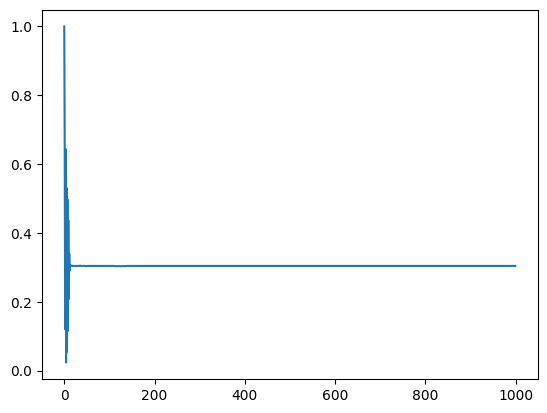

In [47]:
max_iters = 1000
eta = 0.5
Q = 3

Xtrain_poly = polynomialTransform(Xtrain, Q)

w_ply = logisticRegression(Xtrain_poly, ytrain, eta=eta, max_iters=max_iters)


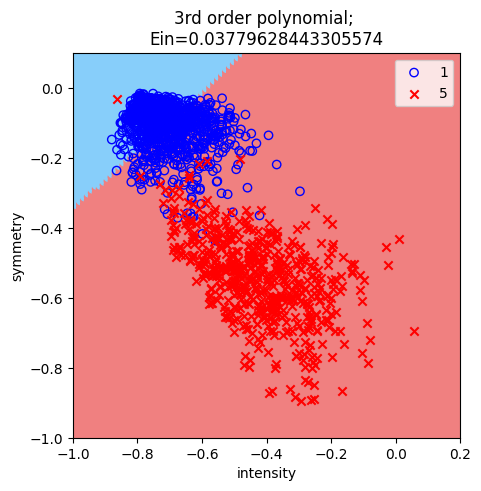

In [50]:
if True:
    Z_Ein = E(w_log, Xtrain, ytrain)
    plotNonLinearSeparator(w_ply, Xtrain, ytrain, Q=Q,
                           title=f'3rd order polynomial; \nEin={Z_Ein}')

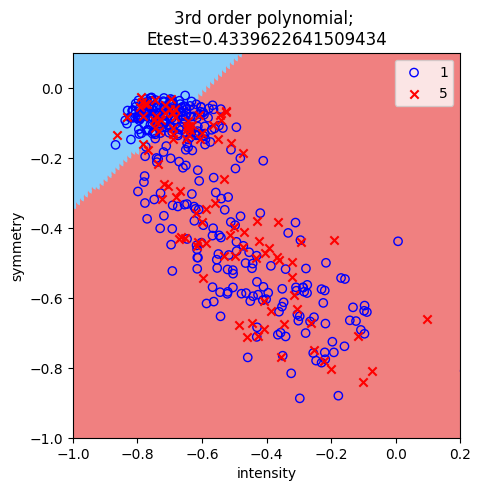

In [52]:
if True:
    Z_Etest = E(w_log, Xtest, ytest)
    plotNonLinearSeparator(w_ply, Xtest, ytest, Q=Q,
                           title=f'3rd order polynomial; \nEtest={Z_Etest}')

In [54]:
import numpy as np

Ein = 0.03779
Etest = 0.4339
N_Ein = 1561
N_Etest = 424
delta = 0.05

# Calculating bounds
Eout_bound_Ein = Ein + np.sqrt((1 / (2 * N_Ein)) * np.log(2 / delta))
Eout_bound_Etest = Etest + np.sqrt((1 / (2 * N_Etest)) * np.log(2 / delta))

print("Bound based on Ein for 3rd order polynomial:", Eout_bound_Ein)
print("Bound based on Etest for 3rd order polynomial:", Eout_bound_Etest)

Bound based on Ein for 3rd order polynomial: 0.07216405617649688
Bound based on Etest for 3rd order polynomial: 0.49985524009424176
